In [37]:
#import pandas for visualization
import pandas as pd

In [38]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [40]:
df.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [41]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [42]:
df.shape

(40, 2)

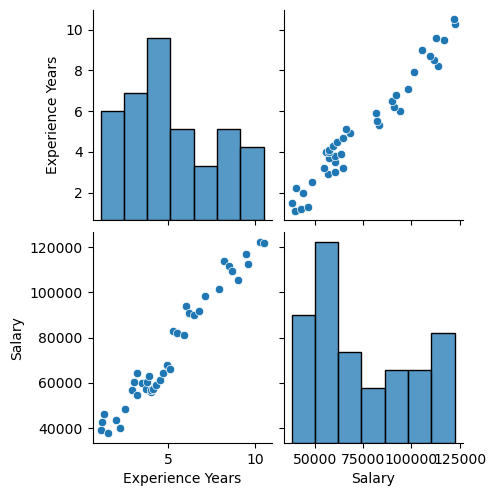

In [43]:
import seaborn as sns
sns.pairplot(df)

In [44]:
corr_max = df.corr()
print(corr_max['Salary'])

Experience Years    0.977692
Salary              1.000000
Name: Salary, dtype: float64


In [45]:
X = df[['Salary']]
y = df['Experience Years']

In [46]:
X.shape, y.shape

((40, 1), (40,))

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (20, 1), (20,), (20,))

In [60]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [61]:
lm.fit(X_train, y_train)

LinearRegression()

In [62]:
predictie = lm.predict(X_test)

In [63]:
w = float(lm.coef_)

b = lm.intercept_

print(f'w = {w}, b = {b}')

w = 0.00010156235623611476, b = -2.498025615408139


/tmp/ipykernel_130649/1842942680.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(lm.coef_)


In [64]:
import numpy as np
X_test = np.array(X_test).reshape(-1)
X_test.shape, predictie.shape

((20,), (20,))

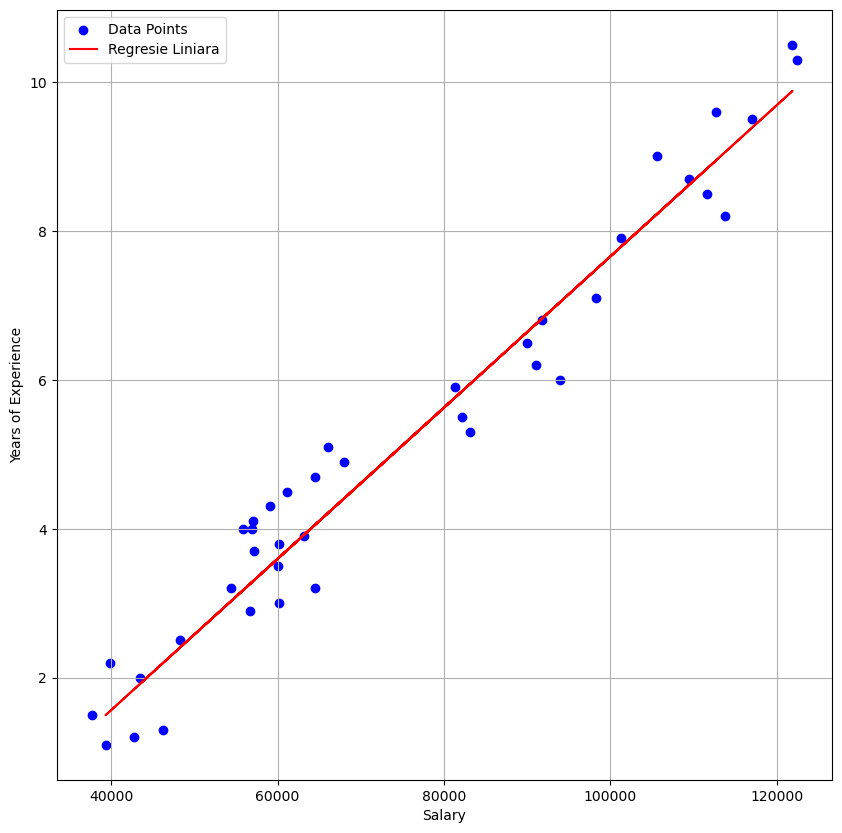

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(X, y, label = 'Data Points', color = 'blue')
plt.plot(X_test, predictie, label = 'Regresie Liniara', color = 'red')
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.legend()

plt.grid()

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, predictie)
mae = mean_absolute_error(y_test, predictie)
mse = mean_squared_error(y_test, predictie)

print(f'R2: {r2}')
print(f'Mean Absolute error: {mae}')
print(f'Mean Squared error: {mse}')

R2: 0.956794831084917
Mean Absolute error: 0.4472086800133079
Mean Squared error: 0.28525240659882967
